<a href="https://colab.research.google.com/github/nabaajafar/Detect-damage-due-pesticide/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
#Load the dataset
from google.colab import files
file=files.upload()
df = pd.read_csv('train.csv')
df.head(7)

Saving train.csv to train (1).csv


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1


In [ ]:
#Count how many rows and columns there (in dataset)
df.shape

(88858, 10)

In [ ]:
#Count the empty values in each columns
df.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
#see the types  
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [ ]:
#df.fillna(0.0)
dn=df.dropna()
dn
#df.replace()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [ ]:
dn['Number_Weeks_Used'] = dn['Number_Weeks_Used'].astype(int)

display(dn.dtypes)
dn.isna().sum()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ID                         object
Estimated_Insects_Count     int64
Crop_Type                   int64
Soil_Type                   int64
Pesticide_Use_Category      int64
Number_Doses_Week           int64
Number_Weeks_Used           int64
Number_Weeks_Quit           int64
Season                      int64
Crop_Damage                 int64
dtype: object

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [ ]:
dn['Crop_Damage'].value_counts()

0    66743
1    11059
2     2056
Name: Crop_Damage, dtype: int64

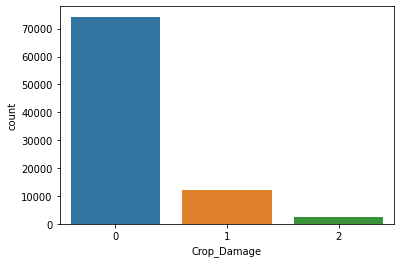

In [ ]:
#Visualize 
sns.countplot(x=df['Crop_Damage'], label='count')

Crop_Damage
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
2    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

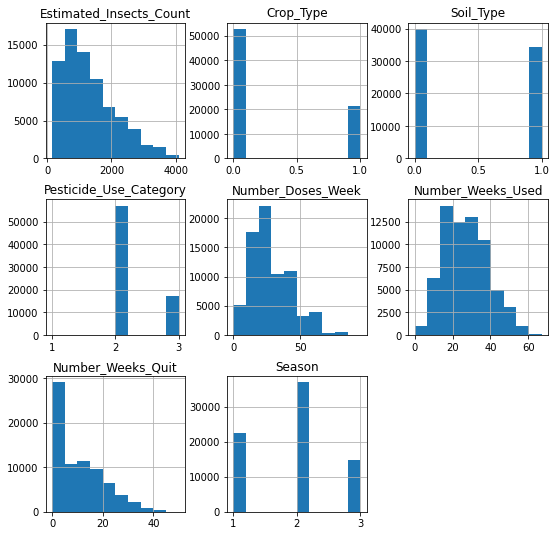

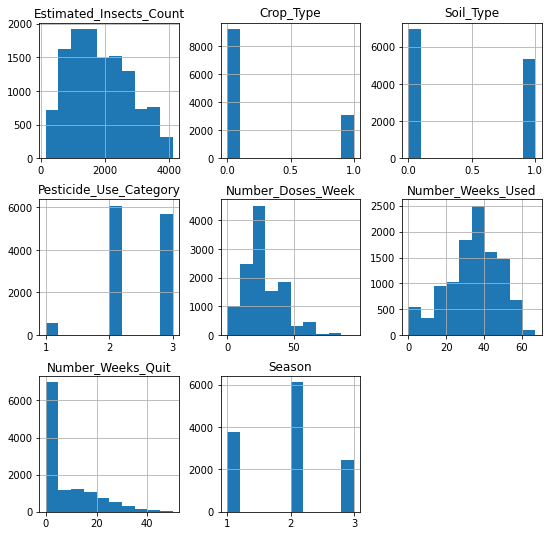

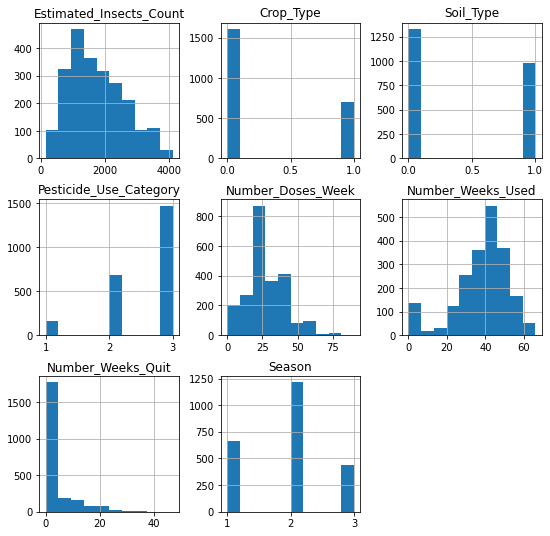

In [ ]:
#histogram
df.groupby('Crop_Damage').hist(figsize=(9, 9))

In [ ]:
#count correlation for columns
df.iloc[:,0:9].corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.434925,0.299279,0.002304
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.043991,-0.233394,0.002161
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.070051,0.009364,0.002327
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.344131,-0.554169,0.002811
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.126426,-0.037131,-0.001401
Number_Weeks_Used,0.434925,-0.043991,-0.070051,0.344131,0.126426,1.000000,-0.449007,0.004417
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.449007,1.000000,0.000595
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004417,0.000595,1.000000


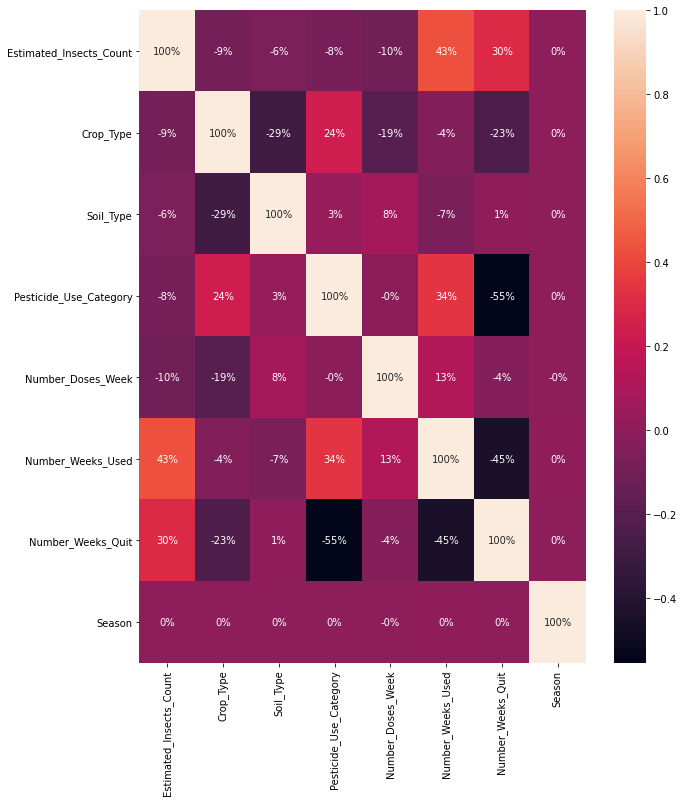

In [ ]:
#Visualize the correlation
plt.figure(figsize=(10,12))
sns.heatmap(df.iloc[:,0:9].corr(), annot=True, fmt='.0%')

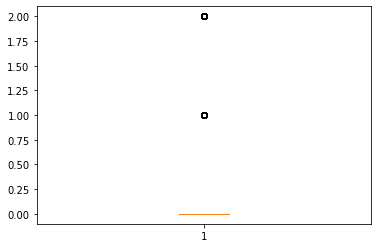

In [ ]:
plt.boxplot(df["Crop_Damage"])
plt.show()

In [ ]:
#detect the outlier
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [ ]:
#dn['ID'] = pd.to_numeric(dn['ID'], errors='coerce')
#dn = dn.replace(np.nan, 0, regex=True)
#dn['ID'] = dn['ID'].astype(int)
#print (dn.dtypes)

ID                         int64
Estimated_Insects_Count    int64
Crop_Type                  int64
Soil_Type                  int64
Pesticide_Use_Category     int64
Number_Doses_Week          int64
Number_Weeks_Used          int64
Number_Weeks_Quit          int64
Season                     int64
Crop_Damage                int64
dtype: object


In [ ]:
#split the data
x = dn.iloc[:, 1:-1].values
y = dn.iloc[:, -1].values



In [ ]:
print(y)
print()
print(x)

[0 1 1 ... 0 0 0]

[[ 188    1    0 ...    0    0    1]
 [ 209    1    0 ...    0    0    2]
 [ 257    1    0 ...    0    0    2]
 ...
 [3516    1    0 ...   40    8    2]
 [3702    1    0 ...   25   18    3]
 [3895    1    0 ...   37    7    3]]


In [ ]:
#75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [ ]:
#scaling data between 0 and 1
#float(dn['ID'])
#print (dn[dn.ID.apply(lambda x: isinstance(x, str))])

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#Create a function for models
def models(x_train, y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 1)
  log.fit(x_train, y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
  tree.fit(x_train, y_train)

  #Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
  forest.fit(x_train, y_train)

  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier()
  knn.fit(x_train, y_train)

  #SVM
  from sklearn.svm import SVC
  svclassifier = SVC(kernel='linear')
  svclassifier.fit(x_train, y_train)

  #ANN
  from sklearn.neural_network import MLPClassifier
  mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
  mlp.fit(x_train, y_train)

  print('The accuracy of ')
  print('Logistic Regression Training : ', log.score(x_train, y_train))
  print('Decision Tree Classifier Training : ', tree.score(x_train, y_train))
  print('Random Forest Classifier Training : ', forest.score(x_train, y_train))
  print('KNN Training : ', knn.score(x_train, y_train))
  print('SVM Training : ', svclassifier.score(x_train, y_train))
  print('ANN Training : ', mlp.score(x_train, y_train))

  return log, tree, forest, knn, svclassifier, mlp

In [ ]:
#call method
model = models(x_train,y_train)


The accuracy of 
Logistic Regression Training :  0.8342544203830163
Decision Tree Classifier Training :  0.985757934984055
Random Forest Classifier Training :  0.9672749737031039
KNN Training :  0.8657939992987495
SVM Training :  0.8366086187033543
ANN Training :  0.8476282704155744


<function matplotlib.pyplot.show>

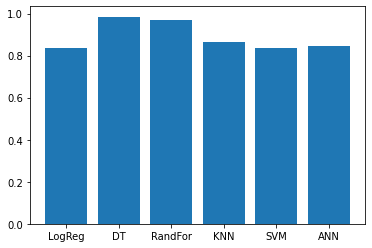

In [ ]:
#Visualization of training accuracy
d1= ['LogReg', 'DT', 'RandFor', 'KNN', 'SVM', 'ANN']
d2 = [0.834, 0.985, 0.967, 0.866, 0.835, 0.845]   
plt.bar(d1, d2)
plt.show

In [ ]:
#Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
  print('Model ', i)
  cm = confusion_matrix(y_test, model[i].predict(x_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[0][1]
  FP = cm[1][0]

  print(cm)
  print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
  print() 

Model  0
[[16448   188     0]
 [ 2669   150     0]
 [  482    28     0]]
Testing Accuracy =  0.8531482909277821

Model  1
[[14193  2084   359]
 [ 1892   769   158]
 [  318   154    38]]
Testing Accuracy =  0.7900517478086387

Model  2
[[15813   730    93]
 [ 2152   564   103]
 [  347   133    30]]
Testing Accuracy =  0.8503556778648943

Model  3
[[15937   679    20]
 [ 2181   610    28]
 [  355   151     4]]
Testing Accuracy =  0.8526304941515948

Model  4
[[16636     0     0]
 [ 2819     0     0]
 [  510     0     0]]
Testing Accuracy =  0.8551015163197122

Model  5
[[16394   242     0]
 [ 2321   498     0]
 [  378   132     0]]
Testing Accuracy =  0.8682600873811359



<function matplotlib.pyplot.show>

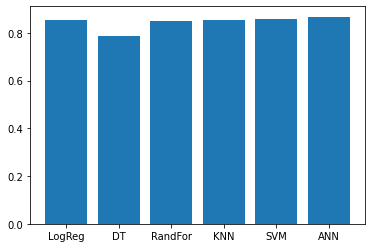

In [ ]:
#Visualization of testing accuracy
d1= ['LogReg', 'DT', 'RandFor', 'KNN', 'SVM', 'ANN']
d2 = [0.855, 0.788, 0.848, 0.854, 0.859, 0.868]   
plt.bar(d1, d2)
plt.show

In [ ]:
#Print the prediction of Model
pred = model[5].predict(x_test)
print(pred)
print()
print(y_test)

[0 0 0 ... 0 0 1]

[0 0 0 ... 1 0 0]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


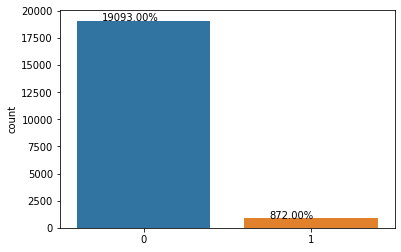

In [ ]:
#The predicted result
p = sns.countplot(pred)
for px in p.patches:
        p.annotate('{:.2f}%'.format(px.get_height()), (px.get_x()+0.15, px.get_height()+1))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


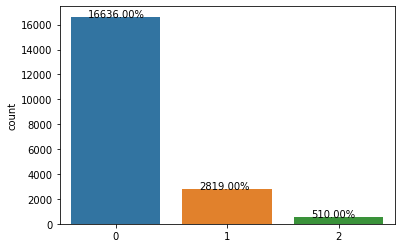

In [ ]:
#The actual result
y = sns.countplot(y_test)
for yt in y.patches:
        y.annotate('{:.2f}%'.format(yt.get_height()), (yt.get_x()+0.15, yt.get_height()+1))

In [ ]:
#Running

#v0 = input("Enter the ID: ")
#v1=int(v0)
v2 = input("Enter the Estimated_Insects_Count: ")
v3 = input("Enter the Crop_Type: ")
v4 = input("Enter the Soil_Type: ")
v5 = input("Enter the Pesticide_Use_Category: ")
v6 = input("Enter the Number_Doses_Week: ")
v7 = input("Enter the Number_Weeks_Used: ")
v8 = input("Enter the Number_Weeks_Quit: ")
v9 = input("Enter the Season: ")

test = [v2, v3, v4, v5, v6, v7, v8, v9]
testArr = np.reshape(test, (1, -1))
testpred = model[5].predict(testArr)
print(testpred)

Enter the Estimated_Insects_Count: 3516
Enter the Crop_Type: 1
Enter the Soil_Type: 0
Enter the Pesticide_Use_Category: 2
Enter the Number_Doses_Week: 15
Enter the Number_Weeks_Used: 40
Enter the Number_Weeks_Quit: 8
Enter the Season: 2
[2]
